In [1]:
"""import packages"""
import networkx as nx
import numpy as np
from PIL import Image
from skimage import morphology
import matplotlib.pyplot as plt
import os
import csv
from ast import literal_eval
print(
     f"here:         current directory/folder address (full path from /Users)\n" +
      "photo_name:   name of photo\n" +
      "photo_type:   type of photo file (INCLUDEs '.'). e.g. .png\n" +
      "project_name: name of project\n" +
      "new_project:  is this a new project? (if so, load from saved files)")

here:         current directory/folder address (full path from /Users)
photo_name:   name of photo
photo_type:   type of photo file (INCLUDEs '.'). e.g. .png
project_name: name of project
new_project:  is this a new project? (if so, load from saved files)


In [2]:
"""Fill out form below!"""
here =          '/Users/kronos.di.vlad/Desktop/dragonfly/extract_images_nb_ver'
photo_name =    'new_pic_fix'
new_project =   True # True OR False only (this is a boolean variable)
photo_type =    '.png'
project_name =  photo_name # I name project by the photo

print(f"your current folder: (below)")
os.chdir(here)
os.system('pwd')

your current folder: (below)
/Users/kronos.di.vlad/Desktop/dragonfly/extract_images_nb_ver


0

In [3]:
filepath = f'{photo_name}{photo_type}' # MUST add extension for move to work!
file_type = 'txt'
nodes_name = f'{project_name}_nodes.{file_type}'
edges_name = f'{project_name}_edges.{file_type}'
detes_name = f'{project_name}_detes.{file_type}'
cycle_name = f'{project_name}_cycle.{file_type}'

if(new_project):
    os.mkdir(project_name)
    os.rename(filepath, f'{project_name}/{filepath}')
os.chdir(project_name)
print(f"your current folder: (below)")
os.system('pwd')

your current folder: (below)
/Users/kronos.di.vlad/Desktop/dragonfly/extract_images_nb_ver/new_pic_fix


0

In [4]:
if(not new_project):
    """load nodes"""
    nodes = np.loadtxt(nodes_name).astype(int)
    """load edges"""
    edges = np.loadtxt(edges_name).astype(int)
    """load cycle"""
    file = open(cycle_name, "r")
    cycles = list(csv.reader(file, delimiter=",", quoting = csv.QUOTE_NONNUMERIC))
    for i in range(len(cycles)):
        cycles[i] = [int(item) for item in cycles[i]]
    """load detes"""
    file = open(detes_name, "r")
    detes = list(csv.reader(file, delimiter=",", quoting = csv.QUOTE_NONNUMERIC))
    for i in range(len(detes)):
        detes[i] = [literal_eval(item) for item in detes[i]]

source: Jordan Hoffmann, Chris H. Rycroft from https://www.pnas.org/doi/10.1073/pnas.1721248115


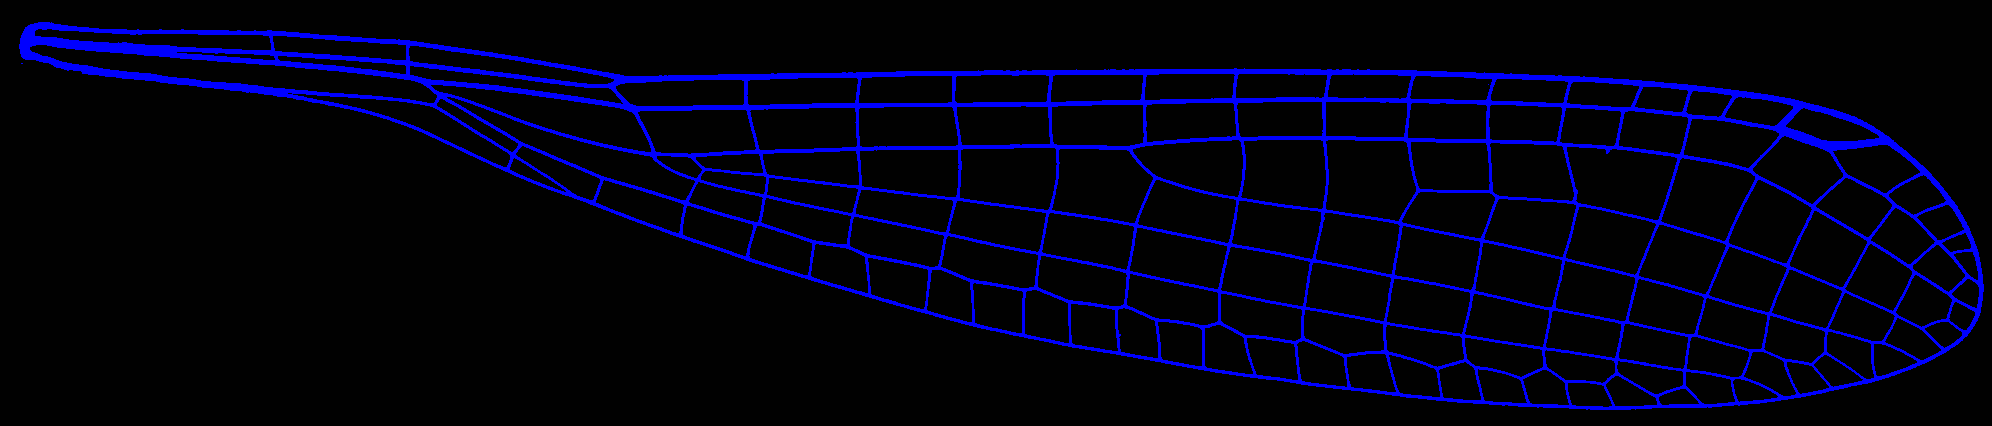

In [5]:
""" black-and-other-color image """
import DualColor
print(f"source: Jordan Hoffmann, Chris H. Rycroft from https://www.pnas.org/doi/10.1073/pnas.1721248115")
dual_color_pic = f'{project_name}_dual_color.png'
street_color_in_rgb = np.asarray([0, 0, 255])
if(new_project):
    og_img = Image.open(filepath)
    threshold = 10 # 135 for radar
    rgb_binary = DualColor.two_colors(filepath, threshold/255.0, street_color_in_rgb)
    pil_img = Image.fromarray(rgb_binary.astype('uint8'), "RGB")
    pil_img.save(dual_color_pic)
else:
    pil_img = Image.open(dual_color_pic)

og_x, og_y, channels = np.asarray(pil_img).shape
pil_img


source: Dan Vanderkam on https://github.com/danvk/extract-raster-network
Street RGB: 	[  0   0 255]
Street pixels: 	68988
Skeleton px=17789
Adding 4/4 dense nodes to existing 278 nodes.
Extracted street network:
  - 206 nodes
  - 346 edges
Skeleton-ize: new_pic_fix_dual_color.skel.png


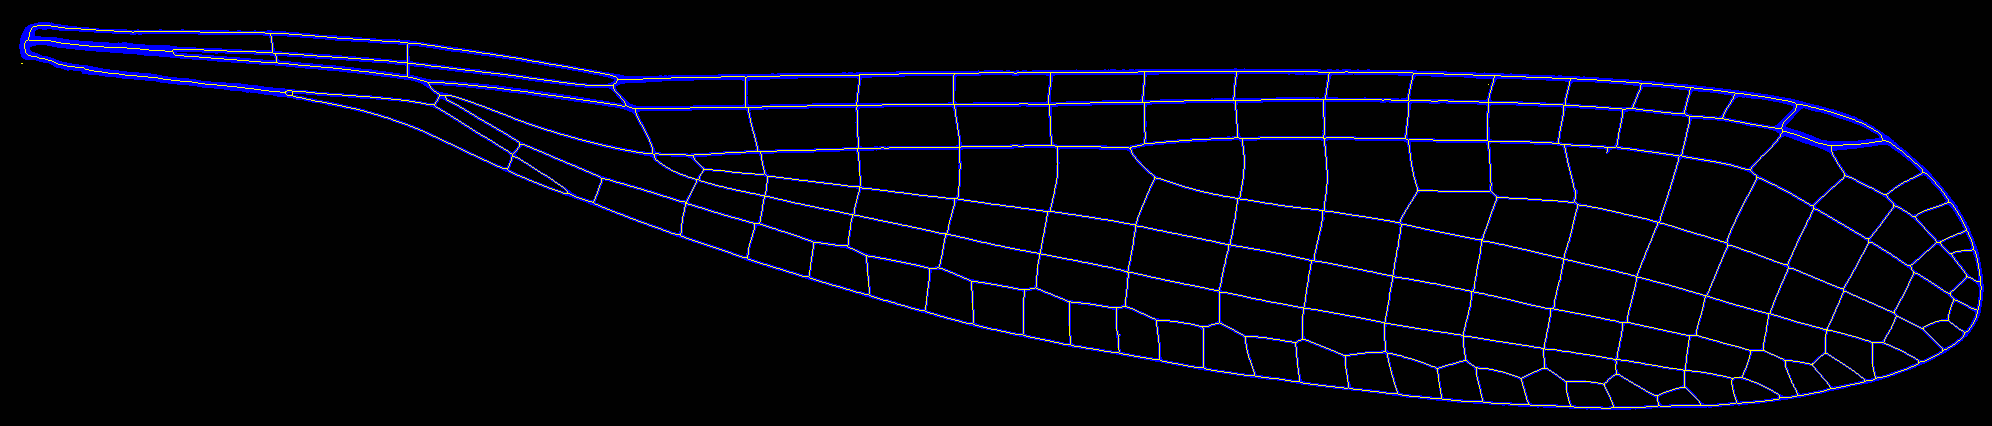

In [6]:
""" graph """
# speed scales with number of pixels
print()
import GetGraph
print(f"source: Dan Vanderkam on https://github.com/danvk/extract-raster-network")
if(new_project):
    img = Image.open(dual_color_pic)
    mask = GetGraph.find_color(img, street_color_in_rgb).T # yes = 1; no = 0

    print(f'Street RGB: \t{street_color_in_rgb}')
    print(f'Street pixels: \t{mask.sum()}')
    network, raw = GetGraph.extract_network(mask)
    print(f'Extracted street network:')
    print(f'  - {len(network.nodes())} nodes')
    print(f'  - {len(network.edges())} edges')

    skel = morphology.skeletonize(mask)
    skel_path = dual_color_pic.replace('.png', '.skel.png')
    skel_img = GetGraph.render_skeleton(img, skel, GetGraph.complement(street_color_in_rgb))
    skel_img.save(skel_path)
    print(f'Skeleton-ize: {skel_path}')

    # showing skeleton takes ridiculously long for large images, skip
    # out_path = dual_color_pic.replace('.png', '.grid.png')
    # GetGraph.render_network(img, network, GetGraph.complement(street_color_in_rgb)).save(out_path)
    # print(f'Graph: {out_path}')
else:
    skel_img = Image.open(dual_color_pic.replace('.png', '.skel.png'))
skel_img

In [7]:
if(new_project):
    number_of_nodes = len(network.nodes())
    list_of_nodes = list(network.nodes())
    number_of_edges = len(network.edges())
    """storage"""
    edges = np.zeros(shape=(number_of_edges, 2)) # array
    index = 0
    detes = []
    for edge in network.edges(data=True):
        x, y, path = edge
        path_object = path['path']
        coords = [*path_object.coords]
        detes.append(coords)
        x_index = list_of_nodes.index(x)
        y_index = list_of_nodes.index(y)
        edges[index] = np.asarray([x_index, y_index])
        index += 1
    """save the nodes"""
    print("saving nodes")
    nodes = np.zeros(shape=(number_of_nodes, 2))
    for i in range(number_of_nodes):
        a_node_in_array = np.asarray(list_of_nodes[i])
        nodes[i] = a_node_in_array   
    np.savetxt(fname=nodes_name, X=nodes, fmt='%i') 
    """save the edges: indices"""
    print("saving edges") 
    np.savetxt(fname=edges_name, X=edges, fmt='%i')
    """save the detes: indices"""
    print("saving detes")
    with open(detes_name, 'w') as f:
        writer = csv.writer(f) # remove quote for string
        writer.writerows(detes) # NOT writerow()

saving nodes
saving edges
saving detes


In [8]:
G = nx.Graph()
counter = 0
for edge in edges:
    x, y = edge
    nx.add_path(G, [x, y])
    G[x][y]['details'] = detes[counter]
    counter += 1

In [9]:
if(new_project):
    """calculate minimum cycle basis"""
    print("running nx.minimum_cycle_basis()")
    cycles = nx.minimum_cycle_basis(G)
    print(f"found {len(cycles)} cycles")
    """sort cycles"""
    sorted_cycles = []
    for cycle in cycles:
        sorted_cycle = []
        real_edges = []
        combinations = [(a, b) for index, a in enumerate(cycle) for b in cycle[index + 1:]]
        for (a, b) in combinations:
            if (a, b) in G.edges():
                real_edges.append((a, b))
        # print(f"real edges: {real_edges}")
        arbitraty_start = real_edges[0][0]
        sorted_cycle.append(arbitraty_start)
        # print(f"sorted cycle start: {sorted_cycle}")
        for i in range(len(cycle)):
            for a, b in real_edges:
                if a == sorted_cycle[-1] and b not in sorted_cycle:
                    sorted_cycle.append(b)
                    continue
                if b == sorted_cycle[-1] and a not in sorted_cycle:
                    sorted_cycle.append(a)
                    continue
        sorted_cycle = sorted_cycle[:len(sorted_cycle)]
        sorted_cycles.append(sorted_cycle)
        # print(f"{cycle} -> {sorted_cycle}")
    cycles = sorted_cycles
    """save the cycle: indices & sorted to follow actual edges"""
    print("saving cycles")
    with open(cycle_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(cycles) # NOT writerow()

running nx.minimum_cycle_basis()
found 141 cycles
saving cycles


detail_level: low = polygons; high = details
detail_type:  fill = colored shapes; anything else = just the edges
centroid:     True = show centroid number; False = no centroid


JupyterSvgInline(svg='<?xml version="1.0" encoding="UTF-8"?>\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"\n     width="2805.6338028169016" height="600" viewBox="0 0 2805.6338028169016 600">\n<defs>\n</defs>\n<path d="M1911.0,268.0 L1868.0,240.0 L1843.0,289.0 L1895.0,314.0 Z" fill="none" stroke="yellow" />\n<path d="M1692.0,335.0 L1684.0,370.0 L1615.0,359.0 L1624.0,322.0 Z" fill="none" stroke="yellow" />\n<path d="M1692.0,335.0 L1705.0,295.0 L1636.0,276.0 L1624.0,322.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1417.0,190.0 L1406.0,139.0 L1487.0,140.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1417.0,190.0 L1400.0,223.0 L1482.0,240.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1575.0,202.0 L1561.0,144.0 L1487.0,140.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1575.0,202.0 L1563.0,258.0 L1482.0,240.0 Z" fill="none" stroke="yellow" />\n<path d="M1298.0,340.0 L1299.0,381.0 L1348.0,387.0 L1345.0,355.0 Z" fill="none" stroke="yellow" />\n<path d="M1245.0,336.0 L1254.0,375.0 L1299.0,381.0 L1298.0,340.0 Z" fill="none" stroke="yellow" />\n<path d="M408.0,43.0 L615.0,83.0 L407.0,62.0 Z" fill="none" stroke="yellow" />\n<path d="M1951.0,253.0 L1966.0,276.0 L1980.0,281.0 L1973.0,249.0 Z" fill="none" stroke="yellow" />\n<path d="M1942.0,350.0 L1964.0,332.0 L1948.0,320.0 L1923.0,328.0 Z" fill="none" stroke="yellow" />\n<path d="M1948.0,320.0 L1964.0,332.0 L1977.0,310.0 L1951.0,296.0 Z" fill="none" stroke="yellow" />\n<path d="M1951.0,296.0 L1966.0,276.0 L1980.0,281.0 L1977.0,310.0 Z" fill="none" stroke="yellow" />\n<path d="M1690.0,87.0 L1735.0,93.0 L1722.0,118.0 L1686.0,115.0 Z" fill="none" stroke="yellow" />\n<path d="M1690.0,87.0 L1686.0,115.0 L1632.0,108.0 L1641.0,83.0 Z" fill="none" stroke="yellow" />\n<path d="M1624.0,322.0 L1636.0,276.0 L1563.0,258.0 L1551.0,308.0 Z" fill="none" stroke="yellow" />\n<path d="M1551.0,308.0 L1624.0,322.0 L1615.0,359.0 L1543.0,348.0 Z" fill="none" stroke="yellow" />\n<path d="M1482.0,240.0 L1563.0,258.0 L1551.0,308.0 L1472.0,291.0 Z" fill="none" stroke="yellow" />\n<path d="M1658.0,222.0 L1636.0,276.0 L1563.0,258.0 L1575.0,202.0 Z" fill="none" stroke="yellow" />\n<path d="M1616.0,146.0 L1607.0,150.0 L1561.0,144.0 L1564.0,105.0 L1622.0,109.0 Z" fill="none" stroke="yellow" />\n<path d="M1680.0,155.0 L1686.0,115.0 L1632.0,108.0 L1622.0,109.0 L1616.0,146.0 Z" fill="none" stroke="yellow" />\n<path d="M1570.0,78.0 L1564.0,105.0 L1622.0,109.0 L1632.0,108.0 L1641.0,83.0 Z" fill="none" stroke="yellow" />\n<path d="M1564.0,105.0 L1561.0,144.0 L1487.0,140.0 L1488.0,102.0 Z" fill="none" stroke="yellow" />\n<path d="M1324.0,99.0 L1323.0,137.0 L1239.0,138.0 L1234.0,100.0 Z" fill="none" stroke="yellow" />\n<path d="M1323.0,210.0 L1323.0,137.0 L1239.0,138.0 L1238.0,198.0 Z" fill="none" stroke="yellow" />\n<path d="M1234.0,100.0 L1239.0,138.0 L1144.0,143.0 L1143.0,102.0 Z" fill="none" stroke="yellow" />\n<path d="M1050.0,72.0 L1144.0,71.0 L1143.0,102.0 L1048.0,104.0 Z" fill="none" stroke="yellow" />\n<path d="M1239.0,138.0 L1238.0,198.0 L1154.0,177.0 L1130.0,148.0 L1144.0,143.0 Z" fill="none" stroke="yellow" />\n<path d="M1054.0,145.0 L959.0,147.0 L955.0,198.0 L1048.0,211.0 Z" fill="none" stroke="yellow" />\n<path d="M953.0,104.0 L959.0,147.0 L1054.0,145.0 L1048.0,104.0 Z" fill="none" stroke="yellow" />\n<path d="M747.0,257.0 L808.0,276.0 L813.0,242.0 L756.0,223.0 Z" fill="none" stroke="yellow" />\n<path d="M764.0,195.0 L697.0,179.0 L686.0,203.0 L756.0,223.0 Z" fill="none" stroke="yellow" />\n<path d="M747.0,257.0 L680.0,234.0 L686.0,203.0 L756.0,223.0 Z" fill="none" stroke="yellow" />\n<path d="M407.0,76.0 L428.0,82.0 L625.0,105.0 L615.0,83.0 L407.0,62.0 Z" fill="none" stroke="yellow" />\n<path d="M434.0,104.0 L512.0,155.0 L519.0,144.0 L442.0,95.0 Z" fill="none" stroke="yellow" />\n<path d="M697.0,179.0 L653.0,154.0 L693.0,155.0 L703.0,169.0 Z" fill="none" stroke="yellow" />\n<path d="M428.0,82.0 L625.0,105.0 L635.0,108.0

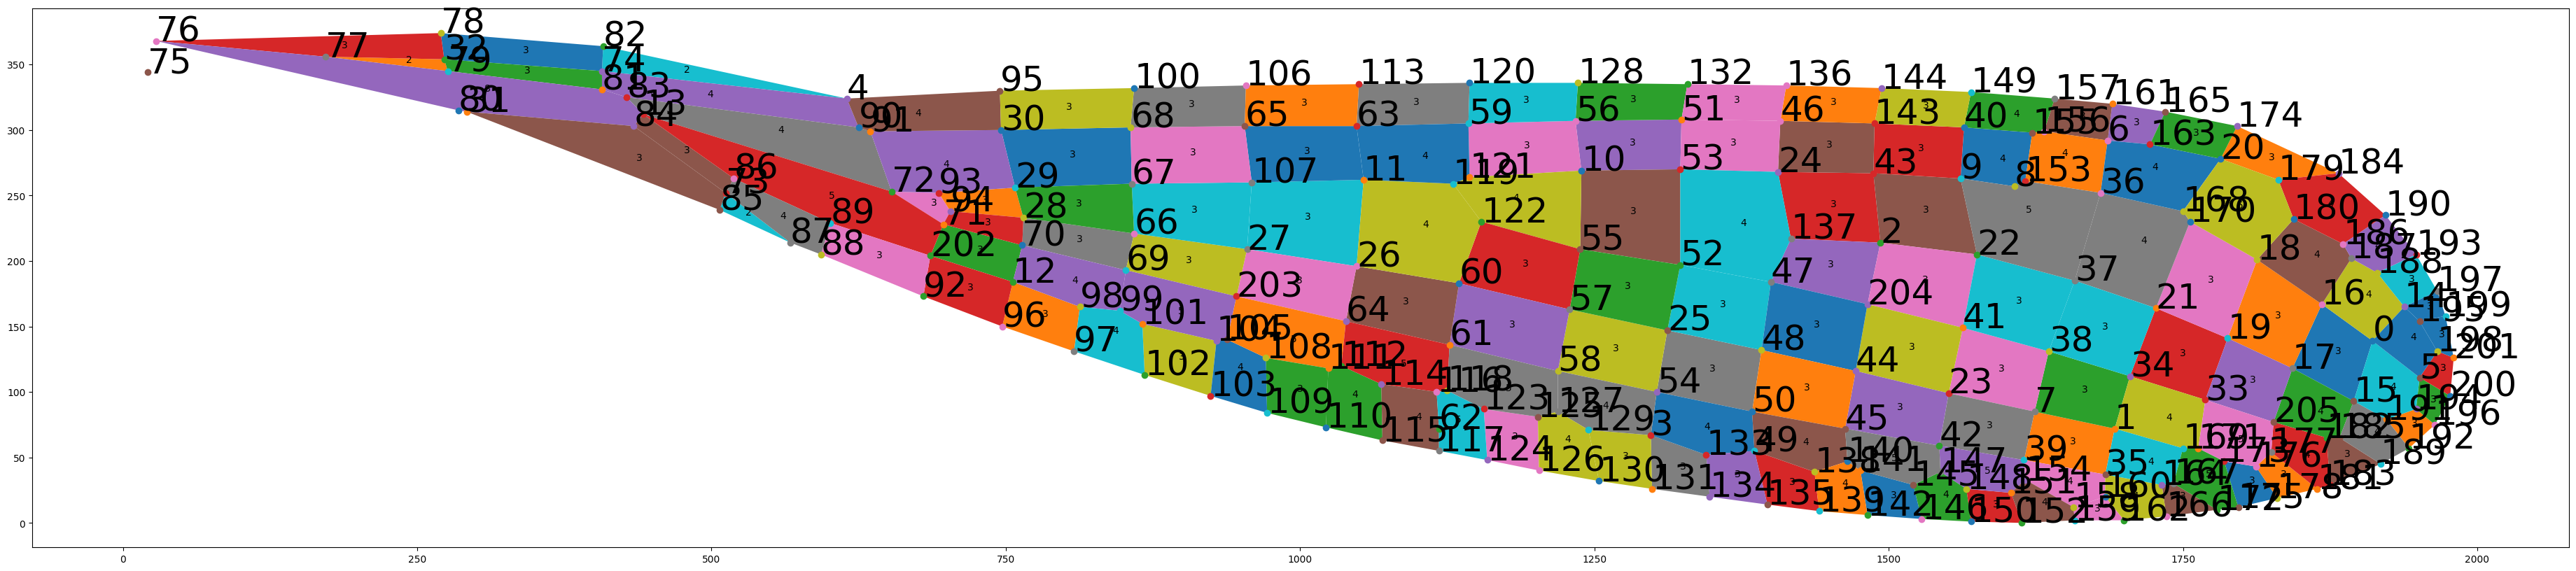

In [10]:
from Visual import Visualizer
import drawsvg as draw 
print(
    f"detail_level: low = polygons; high = details\n" +
     "detail_type:  fill = colored shapes; anything else = just the edges\n" +
     "centroid:     True = show centroid number; False = no centroid")
v = Visualizer(G, nodes, cycles, detes)

plt.figure(figsize=(og_y / og_x * 10, 10))
# v.plot_edge()
v.plot_node()
v.plot_cycle_edge_all("low", "fill", True)

c = draw.Drawing(og_y / og_x * 600, 600, origin='top-left')
v.draw_cycle_edge_all('low', c)
c.save_svg('polygon.svg')
c.display_inline()

In [13]:
c = draw.Drawing(og_y / og_x * 600, 600, origin='top-left')
v.draw_cycle_edge_all('hi', c)
c.save_svg('detail.svg')
c.display_inline()

JupyterSvgInline(svg='<?xml version="1.0" encoding="UTF-8"?>\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"\n     width="2805.6338028169016" height="600" viewBox="0 0 2805.6338028169016 600">\n<defs>\n</defs>\n<path d="M1911.0,268.0 L1909.0,265.0 L1905.0,264.0 L1877.0,245.0 L1872.0,242.0 L1869.0,242.0 L1868.0,240.0 L1868.0,243.0 L1863.0,253.0 L1843.0,289.0 L1844.0,291.0 L1889.0,310.0 L1895.0,314.0 L1893.0,312.0 L1913.0,274.0 Z" fill="none" stroke="yellow" />\n<path d="M1692.0,335.0 L1689.0,336.0 L1688.0,340.0 L1684.0,370.0 L1628.0,360.0 L1621.0,360.0 L1616.0,358.0 L1615.0,359.0 L1617.0,357.0 L1617.0,351.0 L1622.0,330.0 L1622.0,323.0 L1624.0,322.0 L1627.0,321.0 L1667.0,331.0 Z" fill="none" stroke="yellow" />\n<path d="M1692.0,335.0 L1696.0,334.0 L1696.0,329.0 L1705.0,295.0 L1636.0,276.0 L1635.0,286.0 L1627.0,315.0 L1627.0,321.0 L1624.0,322.0 L1627.0,321.0 L1667.0,331.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1490.0,190.0 L1417.0,190.0 L1411.0,166.0 L1408.0,140.0 L1406.0,139.0 L1487.0,140.0 L1490.0,164.0 L1490.0,190.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1490.0,190.0 L1417.0,190.0 L1402.0,215.0 L1399.0,222.0 L1400.0,223.0 L1482.0,240.0 L1481.0,239.0 L1483.0,237.0 L1491.0,211.0 L1496.0,200.0 L1496.0,196.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1497.0,197.0 L1575.0,202.0 L1575.0,190.0 L1573.0,187.0 L1567.0,162.0 L1565.0,148.0 L1563.0,144.0 L1561.0,144.0 L1558.0,142.0 L1552.0,143.0 L1487.0,140.0 L1490.0,164.0 L1490.0,190.0 Z" fill="none" stroke="yellow" />\n<path d="M1493.0,193.0 L1497.0,197.0 L1575.0,202.0 L1577.0,204.0 L1577.0,208.0 L1563.0,258.0 L1482.0,240.0 L1481.0,239.0 L1483.0,237.0 L1491.0,211.0 L1496.0,200.0 L1496.0,196.0 Z" fill="none" stroke="yellow" />\n<path d="M1298.0,340.0 L1295.0,343.0 L1295.0,346.0 L1299.0,381.0 L1303.0,383.0 L1326.0,386.0 L1344.0,388.0 L1348.0,387.0 L1345.0,368.0 L1345.0,355.0 L1302.0,338.0 Z" fill="none" stroke="yellow" />\n<path d="M1245.0,336.0 L1246.0,349.0 L1254.0,375.0 L1291.0,381.0 L1299.0,381.0 L1295.0,346.0 L1295.0,343.0 L1298.0,340.0 L1296.0,342.0 L1292.0,342.0 L1266.0,337.0 Z" fill="none" stroke="yellow" />\n<path d="M408.0,43.0 L420.0,43.0 L453.0,49.0 L489.0,53.0 L599.0,72.0 L615.0,76.0 L617.0,80.0 L615.0,83.0 L612.0,85.0 L575.0,84.0 L515.0,75.0 L431.0,66.0 L407.0,62.0 Z" fill="none" stroke="yellow" />\n<path d="M1951.0,253.0 L1954.0,259.0 L1966.0,274.0 L1966.0,276.0 L1976.0,281.0 L1980.0,281.0 L1977.0,258.0 L1975.0,251.0 L1973.0,249.0 L1955.0,251.0 Z" fill="none" stroke="yellow" />\n<path d="M1942.0,350.0 L1946.0,349.0 L1959.0,340.0 L1963.0,336.0 L1964.0,332.0 L1948.0,320.0 L1935.0,321.0 L1924.0,326.0 L1923.0,328.0 L1942.0,348.0 Z" fill="none" stroke="yellow" />\n<path d="M1948.0,320.0 L1964.0,332.0 L1967.0,331.0 L1973.0,323.0 L1976.0,317.0 L1977.0,310.0 L1955.0,300.0 L1951.0,296.0 L1953.0,298.0 L1953.0,301.0 L1949.0,310.0 Z" fill="none" stroke="yellow" />\n<path d="M1951.0,296.0 L1949.0,293.0 L1966.0,276.0 L1976.0,281.0 L1980.0,281.0 L1980.0,299.0 L1977.0,310.0 L1955.0,300.0 Z" fill="none" stroke="yellow" />\n<path d="M1690.0,87.0 L1735.0,93.0 L1726.0,108.0 L1722.0,118.0 L1686.0,115.0 L1684.0,113.0 L1684.0,110.0 Z" fill="none" stroke="yellow" />\n<path d="M1690.0,87.0 L1684.0,110.0 L1684.0,113.0 L1686.0,115.0 L1684.0,113.0 L1671.0,113.0 L1632.0,108.0 L1640.0,89.0 L1641.0,83.0 Z" fill="none" stroke="yellow" />\n<path d="M1624.0,322.0 L1627.0,321.0 L1627.0,315.0 L1635.0,286.0 L1636.0,276.0 L1563.0,258.0 L1560.0,279.0 L1558.0,282.0 L1554.0,299.0 L1554.0,306.0 L1551.0,308.0 Z" fill="none" stroke="yellow" />\n<path d="M1551.0,308.0 L1624.0,322.0 L1622.0,323.0 L1622.0,330.0 L1617.0,351.0 L1617.0,357.0 L1615.0,359.0 L1570.0,351.0 L1543.0,348.0 Z" fill="none" stroke="yellow" />\n<path d="M1482.0,240.0 L1563.0,258.0 L1560.0,279.0 L1558.0,282.0 L1554.0,299.0 L1554.0,306.0 L1551.0,308.0 L1531.0,305.0 L1506.0,298.0 L1472.0,291.0 L1474.0,288.0 L1476.0,269.0 Z" fill="none" stroke="yellow" />\n<path d=

In [14]:
c = draw.Drawing(og_y / og_x * 600, 600, origin='top-left')
v.draw_edge(c)
c.save_svg('edges.svg')
c.display_inline()

JupyterSvgInline(svg='<?xml version="1.0" encoding="UTF-8"?>\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"\n     width="2805.6338028169016" height="600" viewBox="0 0 2805.6338028169016 600">\n<defs>\n</defs>\n<path d="M1911.0,268.0 L1938.0,242.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1911.0,268.0 L1951.0,296.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1911.0,268.0 L1868.0,240.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1911.0,268.0 L1895.0,314.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1938.0,242.0 L1951.0,253.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1938.0,242.0 L1915.0,216.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1938.0,242.0 L1966.0,230.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1951.0,296.0 L1966.0,276.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1951.0,296.0 L1948.0,320.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1951.0,296.0 L1977.0,310.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1868.0,240.0 L1893.0,205.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1868.0,240.0 L1843.0,289.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1868.0,240.0 L1813.0,206.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1895.0,314.0 L1883.0,342.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1895.0,314.0 L1923.0,328.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1895.0,314.0 L1843.0,289.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1692.0,335.0 L1684.0,370.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1692.0,335.0 L1705.0,295.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1692.0,335.0 L1750.0,350.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1692.0,335.0 L1624.0,322.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1684.0,370.0 L1684.0,387.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1684.0,370.0 L1732.0,378.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1684.0,370.0 L1615.0,359.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1705.0,295.0 L1727.0,243.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1705.0,295.0 L1769.0,313.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1705.0,295.0 L1636.0,276.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1750.0,350.0 L1742.0,377.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1750.0,350.0 L1763.0,350.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1624.0,322.0 L1615.0,359.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1624.0,322.0 L1636.0,276.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1624.0,322.0 L1551.0,308.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1493.0,193.0 L1482.0,240.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1493.0,193.0 L1487.0,140.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1493.0,193.0 L1417.0,190.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1493.0,193.0 L1575.0,202.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1482.0,240.0 L1563.0,258.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1482.0,240.0 L1472.0,291.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1482.0,240.0 L1400.0,223.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1487.0,140.0 L1561.0,144.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1487.0,140.0 L1406.0,139.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1487.0,140.0 L1488.0,102.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1417.0,190.0 L1406.0,139.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1417.0,190.0 L1400.0,223.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M1575.0,202.0 L1561.0,144.0" cw="True" stroke="yellow" stroke-width="1" />\n<path d="M157

In [19]:
from playsound import playsound # doesn't stop?
playsound('/Users/kronos.di.vlad/Desktop/dragonfly/extract_images_nb_ver/IRWTS@UH.mp3')

KeyboardInterrupt: 